In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Buyer:
    def __init__(self, id, participating, cash_in_hand, stock, estimate, stock_quantity, long_only, target, stoploss):
        self.id = id
        self.participating = participating
        self.cash_in_hand = cash_in_hand
        self.stock = stock
        self.estimate = estimate
        self.stock_quantity = stock_quantity
        self.random_variable = np.random.normal(loc=0.0, scale=5.0, size=None)
        self.long_only = long_only
        self.bid = None
        self.utility = []
        self.target = target
        self.stoploss = stoploss

In [3]:
class Seller:
    def __init__(self, id, participating, stock, estimate, stock_quantity):
        self.id = id
        self.participating = participating
        self.stock = stock
        self.estimate = estimate
        self.stock_quantity = stock_quantity
        self.random_variable =  np.random.normal(loc=0.0, scale=5.0, size=None)
        self.bid = None
        self.utility = []

In [4]:
class StockExchange:
    def __init__(self, num_buyers, num_sellers, market_sentiment):
        self.num_buyers = num_buyers
        self.num_sellers = num_sellers
        self.buyers = []
        self.sellers = []
        self.trading_prices = {}
        self.rewards = []
        self.stock_prices = {}
        self.market_Sentiment = market_sentiment

    def add_buyer(self, buyer):
        self.buyers.append(buyer)

    def add_seller(self, seller):
        self.sellers.append(seller)

    def set_stock_prices(self, stock_prices):
        self.stock_prices = stock_prices

    def run_auction(self, num_rounds):
        number_rounds_buyers = [0]*self.num_buyers
        number_rounds_sellers = [0]*self.num_sellers
        alpha = 0.05
        for t in range(1, num_rounds+1):
            sorted_buyer_bids = sorted(self.buyers, key = lambda x: x.estimate, reverse = True)
            sorted_seller_bids = sorted(self.sellers, key = lambda x: x.estimate)
            sorted_buyer_bids = [x for x in sorted_buyer_bids if x.participating]
            sorted_seller_bids = [y for y in sorted_seller_bids if y.participating]
            K=0

            while K<min(len(sorted_buyer_bids), len(sorted_seller_bids)) and sorted_buyer_bids[K].estimate >= sorted_seller_bids[K].estimate:
                K+=1
            
            participating_buyers = sorted_buyer_bids[:K]
            participating_sellers = sorted_seller_bids[:K]
            for buyer in participating_buyers:
                number_rounds_buyers[buyer.id-1] += 1
                buyer.estimate = buyer.estimate + np.sqrt(alpha*np.log(t)/number_rounds_buyers[buyer.id-1])
            for seller in participating_sellers:
                number_rounds_sellers[seller.id-1] += 1
                seller.estimte = seller.estimate - np.sqrt(alpha*np.log(t)/number_rounds_sellers[seller.id-1]) 
            trading_prices = {}

            for stock, price in self.stock_prices.items():
                trading_price = (participating_buyers[-1].estimate + participating_sellers[-1].estimate)/2
                trading_prices[stock] = trading_price
            
            self.trading_prices[t] = trading_prices
            # for buyer in participating_buyers:
            #     if t>10 and buyer.long_only == False:
            #         buyer.participating = False
            #     if market_sentiment[t]:
            #         buyer.target += 2
            #         buyer.stoploss -= 2
            #     else:
            #         buyer.target -=2
            #         buyer.stoploss += 2
            #     if buyer.target<trading_prices[buyer.stock] or buyer.stoploss > trading_prices[buyer.stock]:
            #         buyer.participating = False
            sum=0

            for buyer, seller in zip(participating_buyers, participating_sellers):
            
                if buyer.stock == seller.stock:
                    buyer.utility.append(buyer.estimate + buyer.random_variable-trading_prices[buyer.stock])
                    seller.utility.append(trading_prices[seller.stock]-seller.estimate + seller.random_variable)
                    sum += (buyer.estimate + buyer.random_variable-trading_prices[buyer.stock] + trading_prices[seller.stock]-seller.estimate + seller.random_variable)
            self.rewards.append(sum)

    def print_results(self):
        print("Trading Prices:")
        for t, trading_prices in self.trading_prices.items():
            print("Round", t+1)
            for stock, price in trading_prices.items():
                print("Stock:", stock, "Trading Price:", price)
        print("Buyers:")
        for buyer in self.buyers:
            print("Buyer:", buyer.id, "Stock:", buyer.stock, "Utility:", buyer.utility)
        print("Sellers:")
        for seller in self.sellers:
            print("Seller:", seller.id, "Stock:", seller.stock, "Utility:", seller.utility)   

In [5]:
market_sentiment = [True, True, False, False, False, True, False, True, True, True, True, False, False, False, False, False, True, True, True, True, False, True, True, False, True, False, True, True, False, False]

exchange = StockExchange(7, 8, market_sentiment)

In [6]:
buyer1 = Buyer(1, True, 1000, "Stock A", 110, 5, False, 120, 105)
buyer2 = Buyer(2, True, 1500, "Stock A", 120, 10, True, 130, 95)
buyer3 = Buyer(3, True, 700, "Stock A", 115, 5, False, 125, 100)
buyer4 = Buyer(4, True, 1000, "Stock A", 90, 15, True, 100, 85)
buyer5 = Buyer(5, True, 900, "Stock A", 130, 5, False, 140, 110)
buyer6 = Buyer(6, True, 1300, "Stock A", 110, 10, True, 120, 90)
buyer7 = Buyer(7, True, 1000, "Stock A", 105, 7, False, 120, 95)


In [7]:
seller1 = Seller(1, True, "Stock A", 100, 15)
seller2 = Seller(2, True, "Stock A", 110, 15)
seller3 = Seller(3, True, "Stock A", 115, 15)
seller4 = Seller(4, True, "Stock A", 93, 15)
seller5 = Seller(5, True, "Stock A", 105, 15)
seller6 = Seller(6, True, "Stock A", 98, 15)
seller7 = Seller(7, True, "Stock A", 120, 15)
seller8 = Seller(8, True, "Stock A", 110, 15)

In [8]:
exchange.add_buyer(buyer1)
exchange.add_buyer(buyer2)
exchange.add_buyer(buyer3)
exchange.add_buyer(buyer4)
exchange.add_buyer(buyer5)
exchange.add_buyer(buyer6)
exchange.add_buyer(buyer7)

exchange.add_seller(seller1)
exchange.add_seller(seller2)
exchange.add_seller(seller3)
exchange.add_seller(seller4)
exchange.add_seller(seller5)
exchange.add_seller(seller6)
exchange.add_seller(seller7)
exchange.add_seller(seller8)

In [9]:
stock_prices = {"Stock A": 100.0}
exchange.set_stock_prices(stock_prices)

T = 1000
exchange.run_auction(T)

exchange.print_results()

Trading Prices:
Round 2
Stock: Stock A Trading Price: 110.0
Round 3
Stock: Stock A Trading Price: 110.06581922119335
Round 4
Stock: Stock A Trading Price: 110.13347682389093
Round 5
Stock: Stock A Trading Price: 110.19929604508428
Round 6
Stock: Stock A Trading Price: 110.26272785714326
Round 7
Stock: Stock A Trading Price: 110.32382476563754
Round 8
Stock: Stock A Trading Price: 110.38277253533143
Round 9
Stock: Stock A Trading Price: 110.43977365294218
Round 10
Stock: Stock A Trading Price: 110.49501585421852
Round 11
Stock: Stock A Trading Price: 110.54866500487576
Round 12
Stock: Stock A Trading Price: 110.6008653975162
Round 13
Stock: Stock A Trading Price: 110.65174215475231
Round 14
Stock: Stock A Trading Price: 110.70140398576062
Round 15
Stock: Stock A Trading Price: 110.74994573260966
Round 16
Stock: Stock A Trading Price: 110.79745055868995
Round 17
Stock: Stock A Trading Price: 110.84399177632818
Round 18
Stock: Stock A Trading Price: 110.88963435629387
Round 19
Stock: Stoc

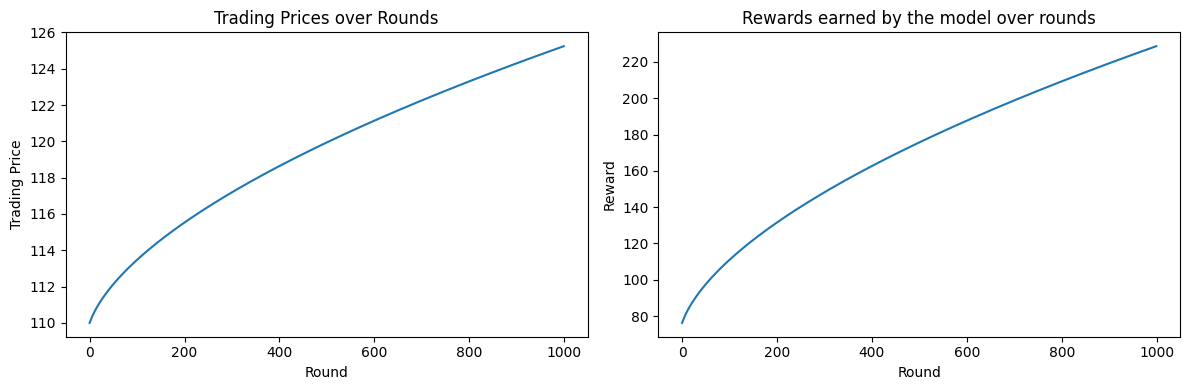

In [10]:
plt.figure(figsize=(12, 4))

y_values = [price for trading_prices in exchange.trading_prices.values() for price in trading_prices.values()]
plt.subplot(1,2,1)
plt.plot(range(T), y_values)
plt.xlabel("Round")
plt.ylabel("Trading Price")
plt.title("Trading Prices over Rounds")

plt.subplot(1,2,2)
plt.plot(range(T), exchange.rewards)
plt.xlabel("Round")
plt.ylabel("Reward")
plt.title("Rewards earned by the model over rounds")

# plt.subplot(1,3,3)
# plt.plot(range(T), market_sentiment)
# plt.xlabel("Round")
# plt.ylabel("Market Benchmark")
# plt.title("Behaviour of Market over time")

plt.tight_layout()
plt.show()